In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data_1 = pd.read_csv('lin_reg_1.txt')

xx = data_1['population']
yy = data_1['profit']

data_1.insert(0, 'ones', 1)
data_1.head()

,ones,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [4]:
cols = data_1.shape[1] # column number

X = np.matrix(data_1.iloc[:, 0:cols-1].values)   # 1's + population
Y = np.matrix(data_1.iloc[:,cols-1:cols].values) # profit
theta = np.matrix(np.zeros(2))

# parameters for gradient descent
m = len(Y)
alpha = 0.01
iters = 1200

print('dimentions of X: {}, dimentions of Y: {}'.format(X.shape,Y.shape))

dimentions of X: (97, 2), dimentions of Y: (97, 1)


In [30]:
def computeCost(X, Y, theta, m):
    difference = (X * theta.T) - Y
    J = ( 1/(2*m) * np.power(difference, 2) ).sum()
    return J

In [31]:
def gradientDescent(X, Y, theta, alpha, iters):
    temp = np.matrix(np.zeros(theta.shape))
    parameters = theta.shape[1]
    cost = np.zeros(iters)

    for i in range(iters):
        difference = (X * theta.T) - Y
        for j in range(parameters):
            term = np.multiply(difference, X[:,j])
            temp[0,j] = theta[0,j] - ( alpha/len(X) * np.sum(term) )
            theta = temp
            cost[i] = computeCost(X, Y, theta, m)

    return theta, cost

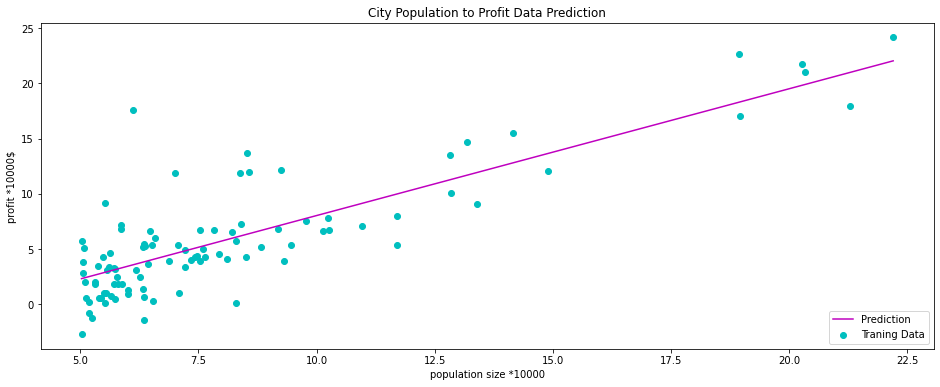

In [35]:
# update theta
theta_update, cost = gradientDescent(X, Y, theta, alpha, iters)

# function that fits the dataset
x = np.linspace(data_1.population.min(), data_1.population.max(), 100) 
fitting_function = theta_update[0,0] + (theta_update[0,1]*x)

# plot results
fig, ax = plt.subplots(figsize=(16,6))
ax.plot(x, fitting_function, c='m', label='Prediction')
ax.scatter(data_1.population, data_1.profit, c='c',label='Traning Data')
ax.set_xlabel('population size *10000')
ax.set_ylabel('profit *10000$')
ax.set_title('City Population to Profit Data Prediction')
ax.legend(loc=4)
plt.show()

In [38]:
# Change in Cost Function
# plt.figure(figsize=(5, 5))
# plt.xlabel('number of iterations')
# plt.ylabel('cost function values')
# plt.title("Change In Cost Function")
# plt.plot(np.arange(iters), cost, c='b')
# plt.show()

In [46]:
data_2 = pd.read_csv('lin_reg_2.txt')
data_2.head()

,house_size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [47]:
data_2 = (data_2 - data_2.mean())/data_2.std() # normalize
data_2.head()

,house_size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [48]:
data_2.insert(0, 'ones', 1)
cols_m = data_2.shape[1]

X_m = np.matrix(data_2.iloc[:,0:cols_m-1].values)
Y_m = np.matrix(data_2.iloc[:,cols_m-1:cols_m].values)
theta_m = np.matrix(np.zeros(3))

print('dimentions of X_m: {}, dimentions of Y_m: {}'.format(X_m.shape,Y_m.shape))

dimentions of X_m: (47, 3), dimentions of Y_m: (47, 1)
